Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Nhat Pham"
COLLABORATORS = ""

---

# CS110 Pre-class Work 5.2

## Question 1.
Using Figure 7.1 in Cormen et al. as a model, perform manually the partition process on the following list: A = [1,5,6,2,3,8,9,4,7]. You just need to specify the followings:
1. The array after the process is done.
2. The value of $i$ after the process is done.


* j = 0, i = -1. A[j] = 1 -> i = 0 -> swap A[i]=1 and A[j]= 1. A stays the same
    * A = [1, 5, 6, 2, 3, 8, 9, 4, 7]
* j = 1, i = 0 -> 5<7 -> i = 1 -> swap 5 and 5. A stays the same
    * A = [1, 5, 6, 2, 3, 8, 9, 4, 7]
* j = 2, i = 1 -> 6<7 -> i = 2 -> swap 6 and 6. A stays the same
    * A = [1, 5, 6, 2, 3, 8, 9, 4, 7]
* j = 3, i = 2 -> 2<7 -> i = 3 -> swap 2 and 2. A stays the same
    * A = [1, 5, 6, 2, 3, 8, 9, 4, 7]
* j = 4, i = 3 -> 3<7 -> i = 4 -> swap 3 and 3. A stays the same
    * A = [1, 5, 6, 2, 3, 8, 9, 4, 7]
* j = 5, i = 4 -> 8 > 7 -> do nothing
    * A = [1, 5, 6, 2, 3, 8, 9, 4, 7]
* j = 6, i = 4 -> 9>7 -> do nothing
    * A = [1, 5, 6, 2, 3, 8, 9, 4, 7]
* j = 7, i = 4 -> 4<7 -> i = 5 -> swap 8 and 4.
    * A = [1, 5, 6, 2, 3, 4, 9, 8, 7]

* return i + 1 = 5 + 1 = 6

## Question 2.
Code up a Python implementation of `partition(A, p, r)`, closely follow the pseudo-code in Cormen et al., p.172. Your function should return the index of the pivot in the array.

In [77]:
def partition(A,p,r):
    """
    Assume r<len(A) and p>=0
    """
    x = A[r]
    i = p - 1
    for j in range(p,r):
        if A[j] <= x:
            i +=1
            A[j], A[i] = A[i], A[j]
    A[i+1], A[r] = A[r], A[i+1]
    return i+1
A = [1,5,6,2,3,8,9,4,7]

partition(A, 0, len(A)-1)
#     raise NotImplementedError()

6

In [66]:
for j in range(0,-1):
    print(j)

In [78]:
A = [1,5,6,2,3,8,9,4,7]
assert(partition(A, 0, len(A)-1)==6)

## Question 3.

Code up your own Python implementation of `quicksort(A, p, r)`, using `partition(A,p,r)`.

In [79]:
def quick_sort(A,p,r):
    if p < r:
        q = partition(A,p,r)
        quick_sort(A,p,q-1)
        quick_sort(A,q,r)
        return(A)
    else:
        return A
    
#     raise NotImplementedError()
A = [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
quick_sort(A, 0, len(A)-1)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [80]:
A = [0]
assert(quick_sort(A, 0, 0) == [0])
A = [3,1,2]
assert(quick_sort(A, 0, 2) == [1,2,3])

## Question 4. 
Explain (using experimental plots) the running time of `quick_sort` when: 
1. all elements of array A have the same value (e.g., [1,1,1])?
2. array A contains distinct elements sorted in decreasing order (e.g., [5,4,2,1])?


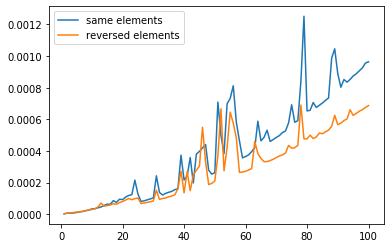

In [82]:
import time
import matplotlib.pyplot as plt
same_time = [] #list of running time of inputs having the same elements
reversed_time = [] #list of running time of inputs having reversed elements
input_size = [] #input size
for input_sz in range(1,101): #run the loop 100 times with input size from 1 to 99
    input_size.append(input_sz)

    same_input = [1] * input_sz #create inputs having the same elements
    start = time.time() #mark starting time
    quick_sort(same_input,0,len(same_input)-1) #run
    end = time.time() #mark the ending moment
    same_time.append(end-start) #add running time to the result list
    
    reversed_input = list(reversed(range(input_sz))) #create inputs having reversed elements
    start = time.time()
    quick_sort(reversed_input,0,len(reversed_input)-1)
    end = time.time()
    reversed_time.append(end-start)
    
plt.plot(input_size,same_time) 
plt.plot(input_size,reversed_time) 
plt.legend(['same elements','reversed elements'])
# raise NotImplementedError()

Conclusion: running time of input having the same elements is generally longer as in the partition function has to do the swap command in every loop, which does not happend in the resversed list